In [1]:
'''
Train and test a DQN across the simulated environment.
'''

import Portfolio_Gym
import gym
import numpy as np

import sys
sys.path.append('/Users/jakefowler/Documents/GitHub/rl-portfolio/Stable_Agents')
# import DQN_MH_TF as DQN
import DQN_MH_NP as DQN
import Wrapper

import multiprocessing   as mp
import matplotlib.pyplot as plt


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████| 5000/5000 [00:11<00:00, 439.05it/s]


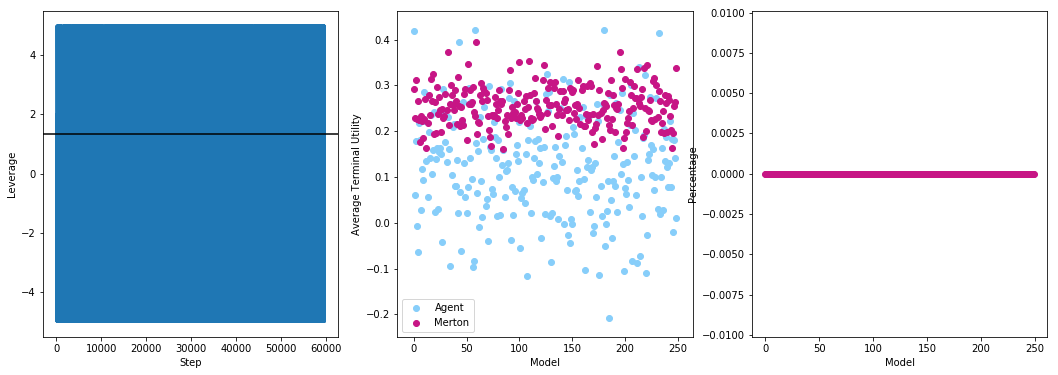

In [2]:
''' Simulated-v0 : Up to N assets, but no explanitory factors. '''

N_Eps  = int(5e3)
Network_Hypers   = {"Learning Rate" : 0.05,
                    "Epoch"         : 10,
                    "Batch Size"    : 240,
                    "Network Size"  : [4,4],
                    "Activation"    : "Relu",
                    "Alpha"         : 0.05}


# Function to facilitate mulitprocessing.
def Run(seed):
    np.random.seed(seed)
    Env = gym.make('Simulated-v0')
    Env.Set_Params(Max_Leverage = 5, Min_Leverage = -5)
    
    myDQN = DQN.DQN_MH(Env, 11, Network_Hypers, Gamma = 0.98, Epsilon_Range = [1, 0.1], Epsilon_Anneal = 0.1, Retrain_Frequency = 20)
    
    myWrapper = Wrapper.Wrapper(myDQN)
    myWrapper.Train(N_Eps, Plot = ['Mu', 'Merton_Benchmark', 'Percent_Merton_Action'])
    
    return myWrapper

# Run the investigation...
with mp.Pool(mp.cpu_count()) as pool:
    myWrappers = pool.map(Run, np.random.randint(0, int(1e9), 1))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████| 5000/5000 [02:30<00:00, 33.32it/s]


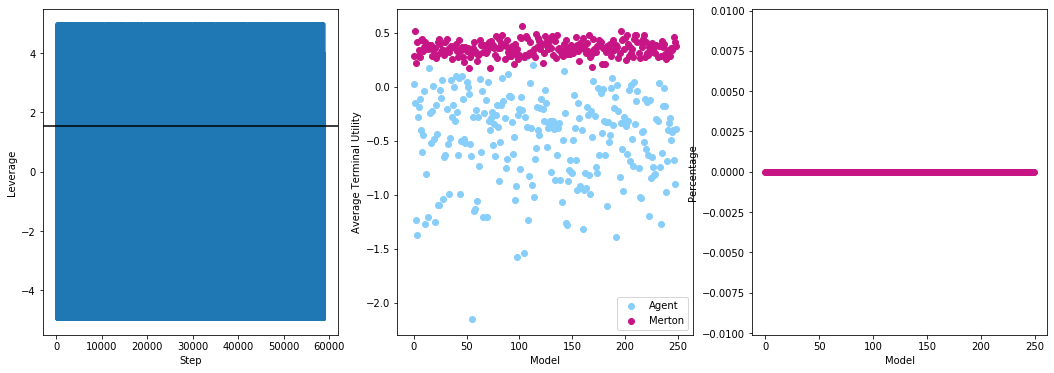

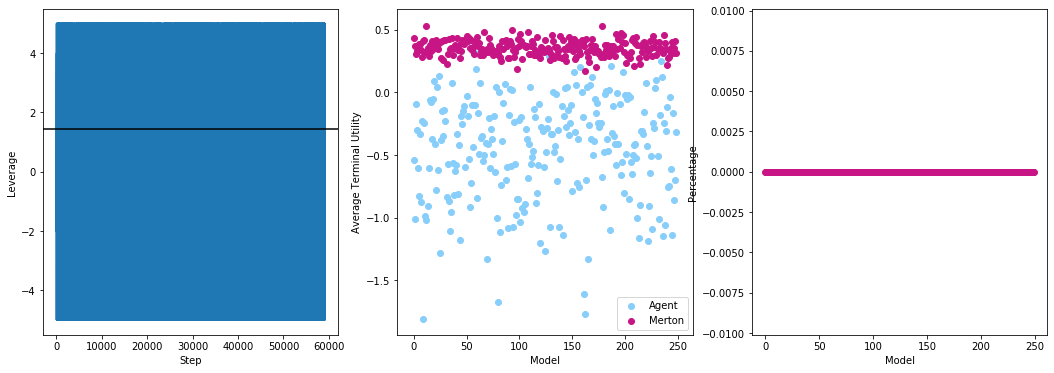

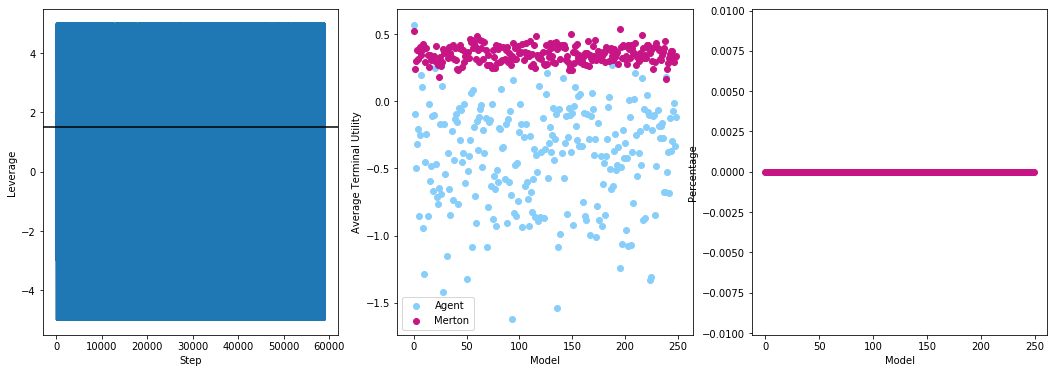

In [5]:
''' Simulated-v1 : Up to N assets, and up to M factors. Here using one asset and one factor with heavy corrolation to aid the AC in its solution '''

N_Eps  = int(5e3)
Network_Hypers   = {"Learning Rate" : 0.05,
                    "Epoch"         : 10,
                    "Batch Size"    : 240,
                    "Network Size"  : [4,4],
                    "Activation"    : "Relu",
                    "Alpha"         : 0.05}


# Single asset single factor with high R2
Factor_Beta = np.array([-0.1694, 0.9514]).reshape(-1,1)
Asset_Beta  = np.array([0.5549, 0.1568]).reshape(-1,1)
Cov         = np.array([[6.225, -6.044], [-6.044, 6.316]]) * 1e-3


# Brandt Parameters
# Factor_Beta = np.array([-0.1694, 0.9514]).reshape(-1,1)
# Asset_Beta  = np.array([0.2049, 0.0568]).reshape(-1,1)
# Cov         = np.array([[6.225, -6.044], [-6.044, 6.316]]) * 1e-3



# Function to facilitate mulitprocessing.
def Run(seed):
    np.random.seed(seed)
    Env = gym.make('Simulated-v1')
    Env.Set_Params(Factor_Beta = Factor_Beta, Asset_Beta = Asset_Beta, Cov = Cov, Period = 0.25, Max_Leverage = 5, Min_Leverage = -5)
    
    myDQN = DQN.DQN_MH(Env, 11, Network_Hypers, Gamma = 0.98, Epsilon_Range = [1, 0.1], Epsilon_Anneal = 0.1, Retrain_Frequency = 20)
    
    myWrapper = Wrapper.Wrapper(myDQN)
    myWrapper.Train(N_Eps, Plot = ['Mu', 'Merton_Benchmark', 'Percent_Merton_Action'])
    
    return myWrapper

# Run the investigation...
with mp.Pool(mp.cpu_count()) as pool:
    myWrappers = pool.map(Run, np.random.randint(0, int(1e9), 3))

